<a href="https://colab.research.google.com/github/ChanceDurr/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [77]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Import data and add names to the columns
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
                names=['age', 'year', 'pos_nodes', 'survived'])
df.head()

,age,year,pos_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [34]:
#Check to see if df has correct shape(306, 4)
print(f'Shape of the DataFrame is {df.shape}')

# Check for null Values
print(df.isnull().sum())

# Create func to change survived to binary
def survived_to_binary(value):
  if value == 2:
    return 0
  else:
    return value
  
df['survived'] = df['survived'].apply(survived_to_binary)

Shape of the DataFrame is (306, 4)
age          0
year         0
pos_nodes    0
survived     0
dtype: int64


In [4]:
# Check the values of survived
print(df['survived'].value_counts())

# Print first 5 rows
df.head()

1    225
0     81
Name: survived, dtype: int64


,age,year_of_operation,pos_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [97]:
# Bin the ages and pos_nodes
age_bins = pd.cut(df['age'], [30, 40, 50, 60, 70, 83])

node_bins = pd.cut(df['pos_nodes'], [0, 10, 20, 30, 40, 52])


ct = pd.crosstab(node_bins, df['survived'], normalize='index')
ct

survived,0,1
pos_nodes,,
"(0, 10]",0.300000,0.700000
"(10, 20]",0.576923,0.423077
"(20, 30]",0.545455,0.454545
"(30, 40]",1.000000,0.000000
"(40, 52]",0.500000,0.500000


In [95]:
pt = pd.pivot_table(df, values='survived', index=age_bins)
pt

,survived
age,
"(30, 40]",0.900000
"(40, 50]",0.688172
"(50, 60]",0.720430
"(60, 70]",0.714286
"(70, 83]",0.714286


In [98]:
pd.pivot_table(df, values='survived', index=df.year)

,survived
year,
58,0.666667
59,0.666667
60,0.857143
61,0.884615
62,0.695652
63,0.733333
64,0.741935
65,0.535714
66,0.785714


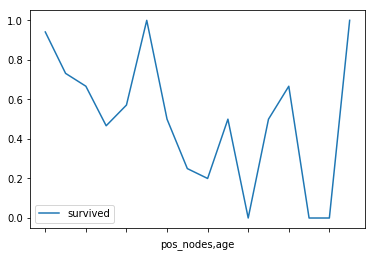

In [94]:
pt.plot()

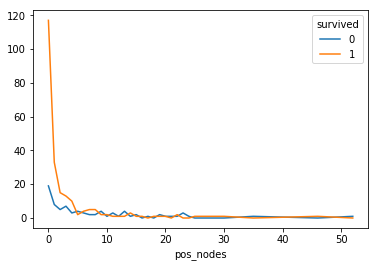

In [90]:
ct.plot()

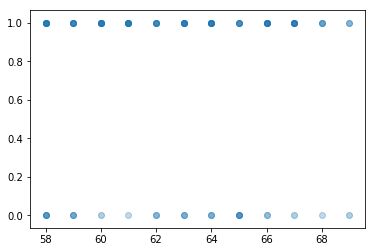

In [66]:
plt.scatter(df.year, df.survived, alpha=0.1)

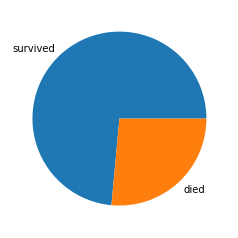

In [61]:
plt.pie(df.survived.value_counts(), labels=['survived', 'died']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Okay, so the features don't affect the survival rate super distinctly. It seems that even as age increases you still have some people die and live. Mainly because there arent too many people getting surgery at higher ages. I did notice that if you are in your 30's you have about 20% more chance of survival. Other than that age is about the same ~70% survival across all ages.
I'd like to say that as the years went by that the technology and studies got better and increase the survival rate, but as you can see in the second pivot table, that the first and last yaer have about the same survival rate and it jumps around a bit between those years.
With the nodes, you could almost argue that the more you have the less likely you are to survive, BUT even at the highest recorded nodes bin, there is a 50% chance of survival which is higher than some of the lower node bins.

This data wasn't very good data for the sprint in my opinion, but I could be very wrong and missing somthing.